# Exercício 03
## Seleção de variáveis
### Alunos:

 - Guilherme Michel Lima de Carvalho 11175052
 - Jaqueline Lopes Dias 11551472
 - Marcos Jardel Henriques 10357438


---

Nesse exercício utilizaremos um dataset para classificação binária. No total são 19 variáveis de entrada e 1 variável de saída. O dataset pode ser encontrado no arquivo "dataset_hepatitis.csv".

Existem valores faltantes nesse dataset, representados pelo caractere "?".

**Há material complementar disponível para resolução desse exercício. Acesse o arquivo "Transformações em dados heterogeneos" antes de prosseguir.**

### Questão 01.

Carregue o dataset (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values`.

In [15]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('dataset_hepatitis.csv',na_values='?')

In [6]:
data.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1.0,85.0,18.0,4.0,NaN,no,1
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135.0,42.0,3.5,NaN,no,1
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96.0,32.0,4.0,NaN,no,1
3,31,female,NaN,yes,no,no,no,yes,no,no,no,no,no,0.7,46.0,52.0,4.0,80.0,no,1
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1.0,NaN,200.0,4.0,NaN,no,1


In [40]:
len(data)

155



---

### Questão 02.

Nessa questão, você irá fazer o pré-processamento dos dados.

Você deve:


*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média (`sklearn.impute.SimpleImputer`). Depois padronize o intervalo dessas variáveis (`sklearn.preprocessing.StandardScaler`)
*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes (`sklearn.impute.SimpleImputer`). Depois converta os dados categóricos para uma representação numérica (`sklearn.preprocessing.OneHotEncoder`),

Lembre-se de utilizar as classes `sklearn.pipeline.Pipeline` e `sklearn.compose.ColumnTransformer` conforme consta no material complementar. 

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [58]:
data.columns

Index(['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME',
       'HISTOLOGY', 'Class'],
      dtype='object')

In [59]:
features_numericos = ['AGE','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN', 'PROTIME']
features_categoricos = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES','HISTOLOGY']

In [60]:
# Criando pipelines 
pipeline_numerico = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')), 
                                    ('scaler', StandardScaler())])
pipeline_categorico = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder())])

In [61]:
# Criando a transformação do conjunto de dados:
transformacao = ColumnTransformer(
    transformers=[
        ('transformacao numerica', pipeline_numerico, features_numericos),
        ('transformacao categorica', pipeline_categorico, features_categoricos),        
    ])

In [69]:
# Aplicando a transformação no dataset:
dados_transformados = transformacao.fit_transform(data)

In [71]:
dados_transformados.round(2)

array([[-0.89, -0.36, -0.44, ...,  0.  ,  1.  ,  0.  ],
       [ 0.7 , -0.45,  0.64, ...,  0.  ,  1.  ,  0.  ],
       [ 2.94, -0.61, -0.2 , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 1.58, -0.53, -0.66, ...,  0.  ,  0.  ,  1.  ],
       [ 0.94,  0.06, -0.53, ...,  1.  ,  0.  ,  1.  ],
       [ 0.14, -0.19, -0.12, ...,  0.  ,  0.  ,  1.  ]])

In [72]:
dados_transformados_com_classe = np.c_[dados_transformados, data['Class']]
dataframe_processado = pd.DataFrame(dados_transformados_com_classe)
dataframe_processado.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.894192,-0.360938,-4.394144e-01,-0.769834,0.297246,-4.146013e-16,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.702579,-0.445364,6.415347e-01,-0.497704,-0.516084,-4.146013e-16,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2.938059,-0.614217,-2.016056e-01,-0.611092,0.297246,-4.146013e-16,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.814353,-0.614217,-1.282555e+00,-0.384316,0.297246,1.058919e+00,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.574838,-0.360938,-3.072242e-16,1.293820,0.297246,-4.146013e-16,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [73]:
nomes = []
# Variáveis numéricas não tem alteração de tamanho, logo:
nomes = nomes + features_numericos

# Para os dados categóricos devemos acessar o transformador:
transformacao_categorica = transformacao.transformers_[1]
# Depois o pipeline
pipeline_categorico = transformacao_categorica[1]
# E finalmente o onehot
transf_onehot = pipeline_categorico.named_steps['onehot']
# Para acessar o nome das variáveis usamos o método get_feature_names()
nomes = nomes + (transf_onehot.get_feature_names().tolist())

nomes.append("classe")

dataframe_processado = pd.DataFrame(data = dados_transformados_com_classe, columns=nomes)

In [74]:
dataframe_processado.head()

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,x0_female,x0_male,x1_no,x1_yes,...,x8_yes,x9_no,x9_yes,x10_no,x10_yes,x11_no,x11_yes,x12_no,x12_yes,classe
0,-0.894192,-0.360938,-4.394144e-01,-0.769834,0.297246,-4.146013e-16,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.702579,-0.445364,6.415347e-01,-0.497704,-0.516084,-4.146013e-16,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2.938059,-0.614217,-2.016056e-01,-0.611092,0.297246,-4.146013e-16,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.814353,-0.614217,-1.282555e+00,-0.384316,0.297246,1.058919e+00,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.574838,-0.360938,-3.072242e-16,1.293820,0.297246,-4.146013e-16,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0




---

### Questão 03.

Determine as 10 variáveis mais relevantes do conjunto (lembre-se de concatenar a variável alvo no dataset transformado). Você pode utilizar a matriz de covariância (`numpy.cov`), correlação (`pandas.DataFrame.corr`), `scatterplot`, etc. Justifique sua escolha.

Lembre-se que heatmaps (`seaborn.heatmap`) podem auxiliar a visualização.

### Primeiramente vejamos apenas a correlação entre as variáveis numéricas.

In [211]:
data_frame_numerico = dataframe_processado[features_numericos]

In [96]:
data_class = pd.DataFrame(data['Class'])

In [100]:
data_frame_numerico_class = data_frame_numerico.join(data_class)

In [102]:
data_frame_numerico_class.head()

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,Class
0,-0.894192,-0.360938,-4.394144e-01,-0.769834,0.297246,-4.146013e-16,1
1,0.702579,-0.445364,6.415347e-01,-0.497704,-0.516084,-4.146013e-16,1
2,2.938059,-0.614217,-2.016056e-01,-0.611092,0.297246,-4.146013e-16,1
3,-0.814353,-0.614217,-1.282555e+00,-0.384316,0.297246,1.058919e+00,1
4,-0.574838,-0.360938,-3.072242e-16,1.293820,0.297246,-4.146013e-16,1


### Matriz de correlação

In [164]:
corr_numerico_class = data_frame_numerico_class.corr()

In [165]:
import seaborn as sns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

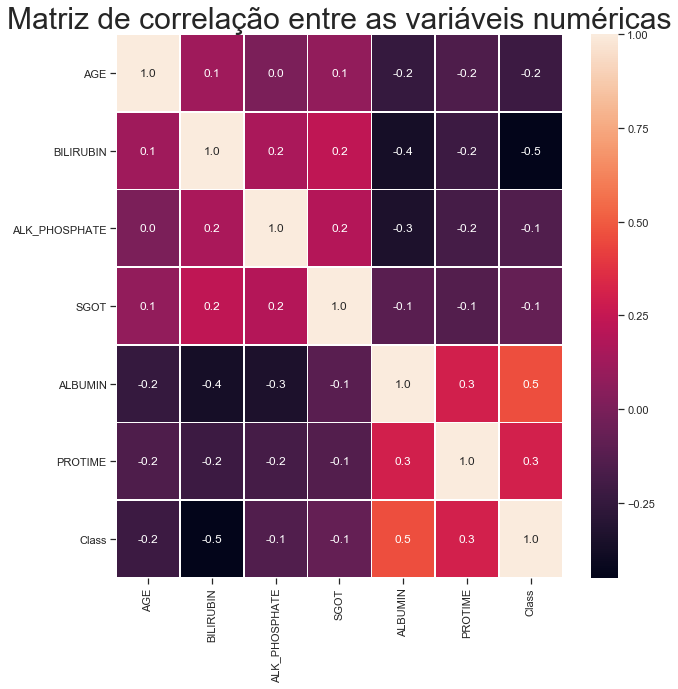

In [166]:
plt.figure(figsize=(10,10))
plt.title('Matriz de correlação entre as variáveis numéricas', fontsize=30)
sns.heatmap(corr_numerico_class, annot=True, linewidths=.5, fmt= '.1f')

A maior correlação que encontramos aqui entre as covariáveis numéricas foi de $-0.4$ entre `BILIRUBIN` e `ALBUMIN`, este valor não é muito alto. Entretanto, essas duas variáveis apresentam correlação de valor $-0.5$ e $0.5$ com a Classe,respectivamente, isto indica que elas são fortes canditadas a entrar no modelo.

### Scatterplot

In [110]:
data_frame_numerico_class.head()

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,Class
0,-0.894192,-0.360938,-4.394144e-01,-0.769834,0.297246,-4.146013e-16,1
1,0.702579,-0.445364,6.415347e-01,-0.497704,-0.516084,-4.146013e-16,1
2,2.938059,-0.614217,-2.016056e-01,-0.611092,0.297246,-4.146013e-16,1
3,-0.814353,-0.614217,-1.282555e+00,-0.384316,0.297246,1.058919e+00,1
4,-0.574838,-0.360938,-3.072242e-16,1.293820,0.297246,-4.146013e-16,1


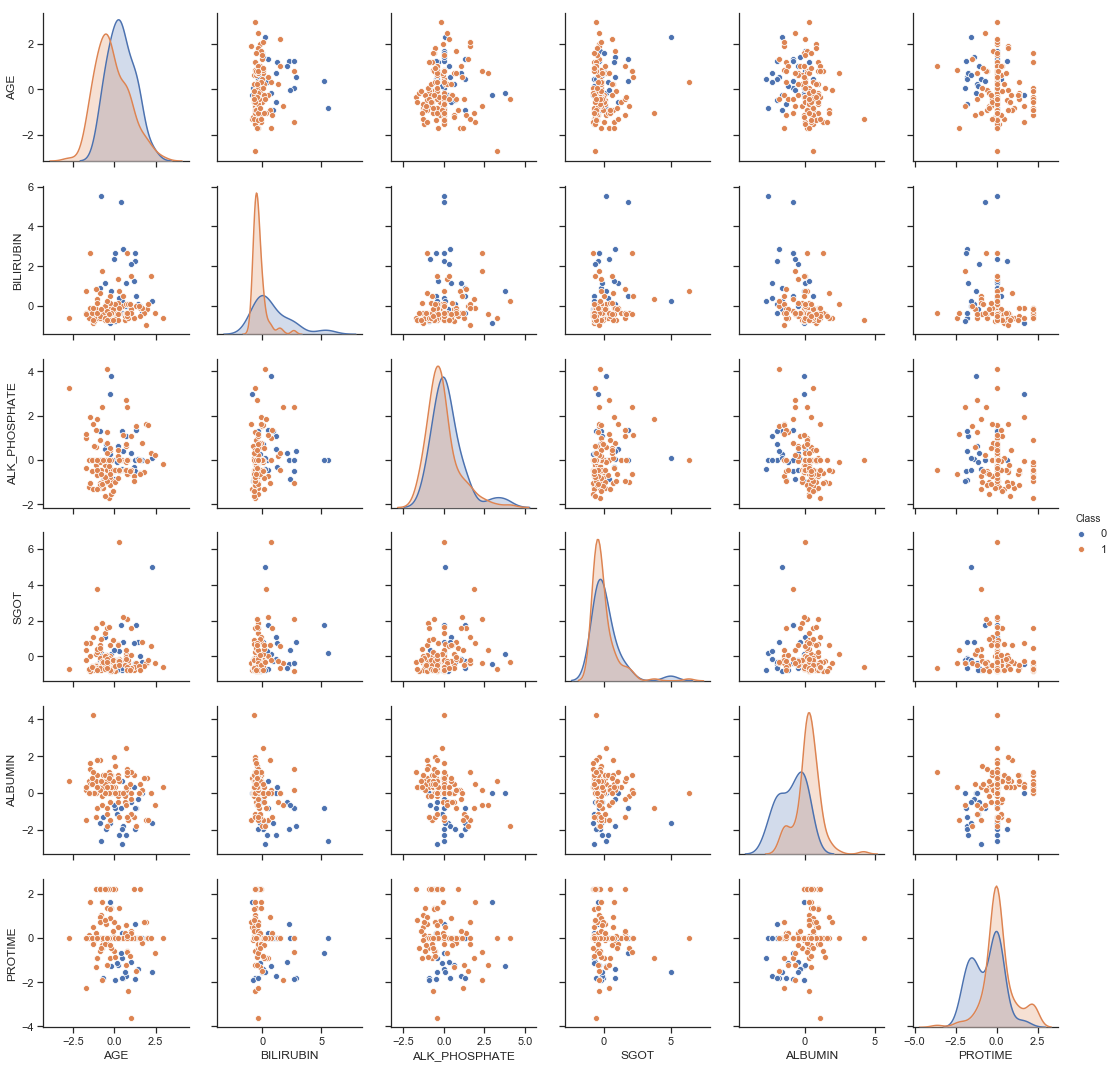

In [117]:
sns.set(style="ticks")
sns.pairplot(data_frame_numerico_class,vars=features_numericos, hue="Class")

No scatterplot anterior vemos que a distruição das classes difere significativamente para alguns casos de covariáveis numéricas.
Como por exemplo para as covariáveis `PROTIME`, `BILIRUBIN` e `ALBUMIN`. Isto indica que essas covariáveis terão um grande impacto no modelo.

### Agora vejamos as covariáveis categóricas. 

In [159]:
data_frame_cat = dataframe_processado.drop(features_numericos,axis=1)

In [161]:
data_frame_cat.head()

,x0_female,x0_male,x1_no,x1_yes,x2_no,x2_yes,x3_no,x3_yes,x4_no,x4_yes,...,x8_yes,x9_no,x9_yes,x10_no,x10_yes,x11_no,x11_yes,x12_no,x12_yes,classe
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


### Matriz de correlação

In [169]:
cat_corr = data_frame_cat.corr()

In [170]:
cat_corr

,x0_female,x0_male,x1_no,x1_yes,x2_no,x2_yes,x3_no,x3_yes,x4_no,x4_yes,...,x8_yes,x9_no,x9_yes,x10_no,x10_yes,x11_no,x11_yes,x12_no,x12_yes,classe
x0_female,1.000000,-1.000000,-0.048985,0.048985,0.089249,-0.089249,0.070059,-0.070059,0.030523,-0.030523,...,-0.048478,0.033192,-0.033192,-0.130587,0.130587,-0.056792,0.056792,-0.137450,0.137450,-0.173051
x0_male,-1.000000,1.000000,0.048985,-0.048985,-0.089249,0.089249,-0.070059,0.070059,-0.030523,0.030523,...,0.048478,-0.033192,0.033192,0.130587,-0.130587,0.056792,-0.056792,0.137450,-0.137450,0.173051
x1_no,-0.048985,0.048985,1.000000,-1.000000,-0.043961,0.043961,-0.175451,0.175451,-0.240139,0.240139,...,0.074816,-0.027290,0.027290,0.031046,-0.031046,0.073548,-0.073548,-0.095367,0.095367,-0.137413
x1_yes,0.048985,-0.048985,-1.000000,1.000000,0.043961,-0.043961,0.175451,-0.175451,0.240139,-0.240139,...,-0.074816,0.027290,-0.027290,-0.031046,0.031046,-0.073548,0.073548,0.095367,-0.095367,0.137413
x2_no,0.089249,-0.089249,-0.043961,0.043961,1.000000,-1.000000,-0.061339,0.061339,-0.016251,0.016251,...,0.164548,-0.147909,0.147909,-0.164747,0.164747,-0.155148,0.155148,-0.209242,0.209242,-0.130196
x2_yes,-0.089249,0.089249,0.043961,-0.043961,-1.000000,1.000000,0.061339,-0.061339,0.016251,-0.016251,...,-0.164548,0.147909,-0.147909,0.164747,-0.164747,0.155148,-0.155148,0.209242,-0.209242,0.130196
x3_no,0.070059,-0.070059,-0.175451,0.175451,-0.061339,0.061339,1.000000,-1.000000,0.589030,-0.589030,...,-0.186846,0.367948,-0.367948,0.281439,-0.281439,0.180511,-0.180511,0.146579,-0.146579,0.306049
x3_yes,-0.070059,0.070059,0.175451,-0.175451,0.061339,-0.061339,-1.000000,1.000000,-0.589030,0.589030,...,0.186846,-0.367948,0.367948,-0.281439,0.281439,-0.180511,0.180511,-0.146579,0.146579,-0.306049
x4_no,0.030523,-0.030523,-0.240139,0.240139,-0.016251,0.016251,0.589030,-0.589030,1.000000,-1.000000,...,-0.006470,0.307173,-0.307173,0.320228,-0.320228,0.161422,-0.161422,0.144667,-0.144667,0.339530
x4_yes,-0.030523,0.030523,0.240139,-0.240139,0.016251,-0.016251,-0.589030,0.589030,-1.000000,1.000000,...,0.006470,-0.307173,0.307173,-0.320228,0.320228,-0.161422,0.161422,-0.144667,0.144667,-0.339530


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

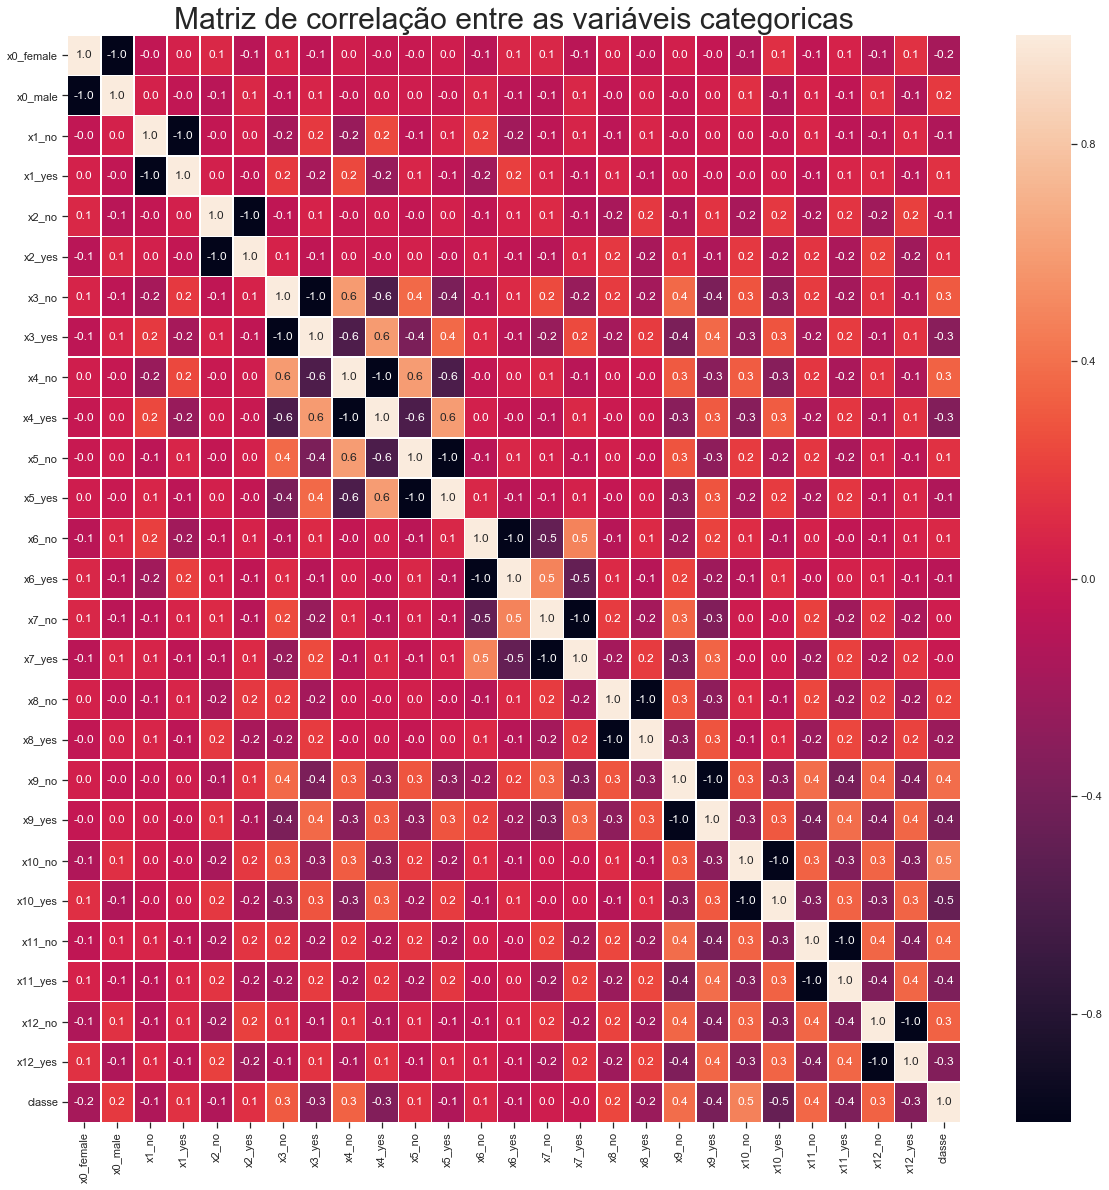

In [172]:
plt.figure(figsize=(20,20))
plt.title('Matriz de correlação entre as variáveis categoricas', fontsize=30)
sns.heatmap(cat_corr, annot=True, linewidths=.5, fmt= '.1f')

Aqui observamos que como todas as variáveis são binárias elas apresentam correlação de $-1$ entre o oposto. Por exemplo,`x0_male` e `x0_female`. Isso acontece para todos os pares, portanto não faz sentido incluir os dois tipos. Observa-se isso nas diagonais superiores e inferiores da diagonal principal. Portanto, vamos criar um novo dataset novo baseado nisso.

In [178]:
nome_class_reduzido = ['x0_female', 'x1_no','x2_no','x3_no','x4_no','x5_no','x6_no','x7_no','x8_no','x9_no','x10_no','x11_no'
                      ,'x12_no','classe']

In [179]:
data_reduzido = data_frame_cat[nome_class_reduzido]

In [180]:
data_reduzido.head()

,x0_female,x1_no,x2_no,x3_no,x4_no,x5_no,x6_no,x7_no,x8_no,x9_no,x10_no,x11_no,x12_no,classe
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Novamente, vamos fazer a matriz de correlação para esse novo dataset

In [181]:
cat_corr2 = data_reduzido.corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

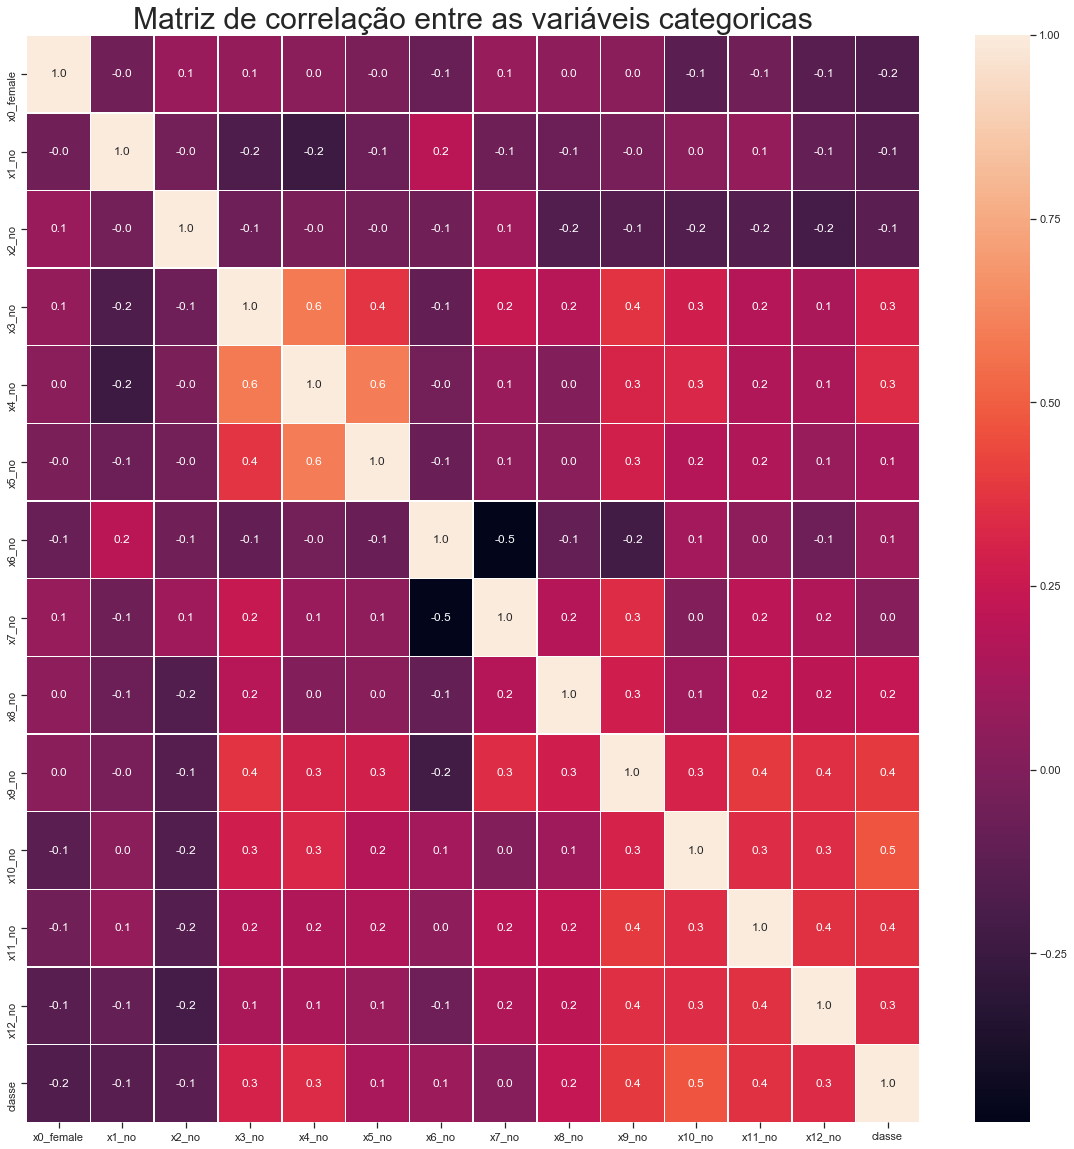

In [182]:
plt.figure(figsize=(20,20))
plt.title('Matriz de correlação entre as variáveis categoricas', fontsize=30)
sns.heatmap(cat_corr2, annot=True, linewidths=.5, fmt= '.1f')

Portanto as variáveis que possuem maior correlação entre si são: x3_no e x4_no, x5_no e x4_no,x5_no e x3_no, x6_no e x7_no,x11_no e x9_no,x_12_no e x9_no. Além disso, a correlação da variável x7_no com a classe é de 0. Levando essas observações em consideração, vamos retirar 6 covariáveis menos importante e deixar o resto pra usar com as numéricas importantes já anteriormente detectadas.

Tendo isso em vista retiramos as variáveis: x3, x4,x5, x6 , x7, x8. E deixamos as variáveis que possuem maior correlação com a classe e pouca correlação entre si.

In [212]:
colunas_importantes = ['BILIRUBIN', 'ALBUMIN', 'PROTIME','x0_female', 'x1_no','x2_no','x9_no','x10_no','x11_no','x12_no','classe'] 



---

### Questão 04.

Com as 10 varíaveis determinadas na questão anterior, crie um novo conjunto de dados.

Lembre-se que o numpy permite indexar colunas/linhas utilizando arrays.

In [218]:
data_importante = dataframe_processado[colunas_importantes]

In [219]:
data_importante.head()

,BILIRUBIN,ALBUMIN,PROTIME,x0_female,x1_no,x2_no,x9_no,x10_no,x11_no,x12_no,classe
0,-0.360938,0.297246,-4.146013e-16,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,-0.445364,-0.516084,-4.146013e-16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,-0.614217,0.297246,-4.146013e-16,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,-0.614217,0.297246,1.058919e+00,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,-0.360938,0.297246,-4.146013e-16,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [312]:
X = data_importante[['BILIRUBIN', 'ALBUMIN', 'PROTIME','x0_female', 'x1_no','x2_no',
                     'x9_no','x10_no','x11_no','x12_no']].to_numpy()
y = data_importante['classe'].to_numpy() 



---

### Questão 05.

Reduza a dimensionalidade do conjunto de dados criado utilizando a técnica PCA (`sklearn.decomposition.PCA`). Reduza a dimensionalidade de forma que no mínimo 80% da variância dos dados seja mantida (atente-se ao atributo  `explained_variance_ratio_`). Depois exiba os eixos principais.

In [248]:
from sklearn.decomposition import PCA 

In [249]:
pca = PCA()

In [253]:
principalComponents = pca.fit_transform(X)

In [254]:
print(pca.explained_variance_ratio_)

[0.41876095 0.19015316 0.1508707  0.06537207 0.05679123 0.03741171
 0.02790685 0.02129897 0.0161136  0.01532075]


Agora temos que somar as variancias dos componentes até que no minimo 80% seja atingido 

In [255]:
np.cumsum(pca.explained_variance_ratio_)

array([0.41876095, 0.60891411, 0.75978481, 0.82515688, 0.88194811,
       0.91935982, 0.94726667, 0.96856564, 0.98467925, 1.        ])

Logo, para isso precisamos de 4 componentes.

In [383]:
pca = PCA(n_components=4)

In [384]:
principalComponents = pca.fit_transform(X)

In [389]:
PCA_df = pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2','principal component 3','principal component 4']) 

In [386]:
PCA_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.499247,-0.268019,-0.059812,-0.669209
1,-0.046419,-0.181822,-0.691319,-0.665708
2,-0.698433,-0.380867,-0.057788,-0.078507
3,-1.275876,0.425356,-0.349277,-0.184494
4,-0.559371,-0.240251,0.093405,-0.121051


In [390]:
PCA4_DF =pd.concat([PCA_df,data[['Class']]],axis=1)

In [391]:
PCA4_DF.head()

,principal component 1,principal component 2,principal component 3,principal component 4,Class
0,-0.499247,-0.268019,-0.059812,-0.669209,1
1,-0.046419,-0.181822,-0.691319,-0.665708,1
2,-0.698433,-0.380867,-0.057788,-0.078507,1
3,-1.275876,0.425356,-0.349277,-0.184494,1
4,-0.559371,-0.240251,0.093405,-0.121051,1


Eixos principais 2D:

In [393]:
pca2 = PCA(n_components=2)
X_r = pca2.fit_transform(X)

In [394]:
PCA_df2 = pd.DataFrame(data=X_r,columns=['principal component 1','principal component 2']) 

In [395]:
finalDf=pd.concat([PCA_df2,data[['Class']]],axis=1)
finalDf.head()

,principal component 1,principal component 2,Class
0,-0.499247,-0.268019,1
1,-0.046419,-0.181822,1
2,-0.698433,-0.380867,1
3,-1.275876,0.425356,1
4,-0.559371,-0.240251,1


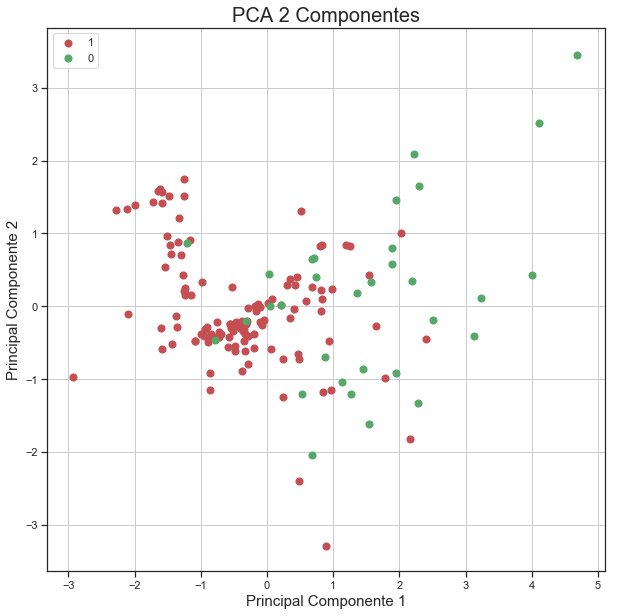

In [396]:
fig=plt.figure(figsize=(10,10))  
ax=fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Componente 1',fontsize = 15)  
ax.set_ylabel('Principal Componente 2',fontsize = 15)  
ax.set_title('PCA 2 Componentes',fontsize=20)  
targets=[1,0] 
colors=['r','g']  
for target,color in zip(targets,colors):    
    indicesToKeep = finalDf['Class'] == target  
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
              finalDf.loc[indicesToKeep,'principal component 2'],
             c=color,
             s=50)
ax.legend(targets)  
ax.grid()

Agora vejamos um scatter plot para os 3 principais componentes.

In [351]:
pca3 = PCA(n_components=3)
X_r = pca3.fit_transform(X)

In [352]:
PCA_df3 = pd.DataFrame(data=X_r,columns=['principal component 1','principal component 2','principal component 3']) 

In [353]:
finalDf3=pd.concat([PCA_df3,data[['Class']]],axis=1)
finalDf3.head()

,principal component 1,principal component 2,principal component 3,Class
0,-0.499247,-0.268019,-0.059812,1
1,-0.046419,-0.181822,-0.691319,1
2,-0.698433,-0.380867,-0.057788,1
3,-1.275876,0.425356,-0.349277,1
4,-0.559371,-0.240251,0.093405,1


In [360]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

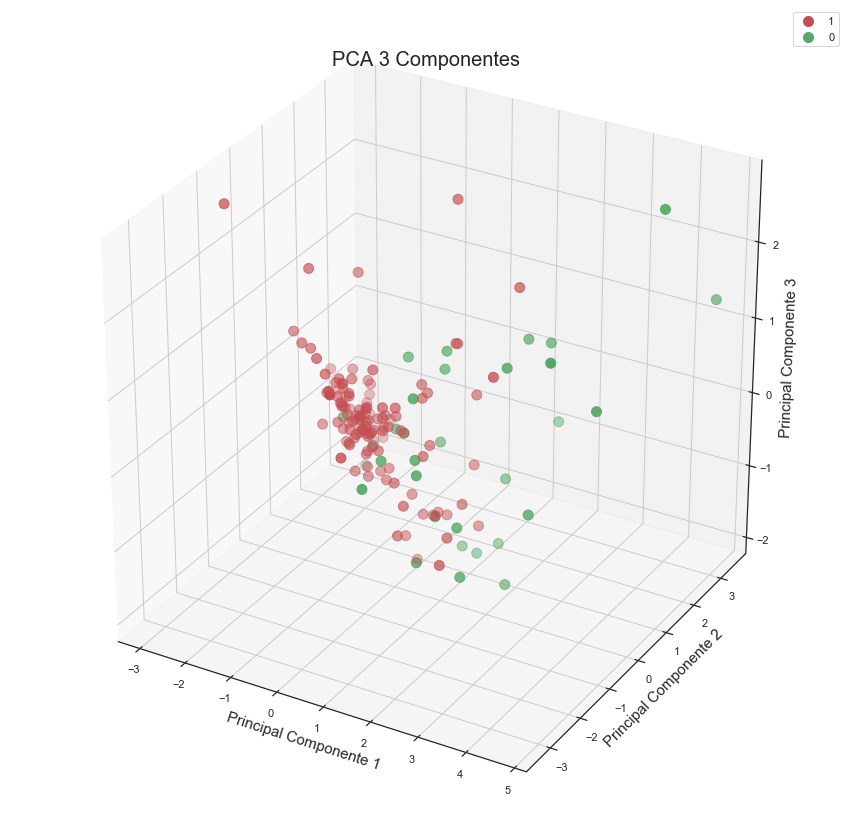

In [366]:
fig=plt.figure(figsize=(15,15))  
ax=fig.add_subplot(111,projection='3d')  
ax.set_xlabel('Principal Componente 1',fontsize = 15)  
ax.set_ylabel('Principal Componente 2',fontsize = 15)
ax.set_zlabel('Principal Componente 3', fontsize=15)
ax.set_title('PCA 3 Componentes',fontsize=20)  
targets=[1,0] 
colors=['r','g']  
for target,color in zip(targets,colors):    
    indicesToKeep = finalDf3['Class'] == target  
    ax.scatter(finalDf3.loc[indicesToKeep,'principal component 1'],
              finalDf3.loc[indicesToKeep,'principal component 2'],
            finalDf3.loc[indicesToKeep,'principal component 3'],
             c=color,
             s=100)
ax.legend(targets)  
ax.grid()



---

### Questão 06.

Teste um modelo de classificação (através da função `model_tester`) nos conjuntos criados nas questões 4 e 5. Houve redução expressiva da acurácia?

In [367]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# - Descrição:  Função que testa um modelo de classificação (MLP). 
# - Parâmetros: Variáveis de entrada (inputs) e a variável alvo (target).
# - Retorna:    Não retorna nenhum valor. Mas imprime a acurácia do modelo.
def model_tester(inputs, target):
  clf = MLPClassifier(hidden_layer_sizes=(5,), random_state=0, max_iter=10000)
  scores = cross_val_score(clf, inputs, target, cv=10)
  print("Score do classificador: %.2f" % (scores.mean()*100))

Testando primeiro o conjunto da questão 4 temos:

In [368]:
data_importante.head()

,BILIRUBIN,ALBUMIN,PROTIME,x0_female,x1_no,x2_no,x9_no,x10_no,x11_no,x12_no,classe
0,-0.360938,0.297246,-4.146013e-16,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,-0.445364,-0.516084,-4.146013e-16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,-0.614217,0.297246,-4.146013e-16,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,-0.614217,0.297246,1.058919e+00,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,-0.360938,0.297246,-4.146013e-16,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [414]:
inputs = data_importante[['BILIRUBIN', 'ALBUMIN', 'PROTIME','x0_female', 'x1_no','x2_no','x9_no','x10_no','x11_no','x12_no']]

In [415]:
target = data_importante[['classe']]
target=np.array(target)

In [416]:
target = target.reshape(len(target),)

In [417]:
model_tester(inputs,target)

Score do classificador: 83.87


Agora vamos testar para o PCA com 4 componentes, que explica 80% da variancia

In [418]:
PCA4_DF.head()

,principal component 1,principal component 2,principal component 3,principal component 4,Class
0,-0.499247,-0.268019,-0.059812,-0.669209,1
1,-0.046419,-0.181822,-0.691319,-0.665708,1
2,-0.698433,-0.380867,-0.057788,-0.078507,1
3,-1.275876,0.425356,-0.349277,-0.184494,1
4,-0.559371,-0.240251,0.093405,-0.121051,1


In [419]:
inputs = PCA4_DF[['principal component 1','principal component 2','principal component 3','principal component 4']]

In [420]:
model_tester(inputs,target)

Score do classificador: 85.21


Conclusão: Usando o dataset da questão 4, que possue todas as 10 covariáveis selecionadas obtivemos um score de 83.87. Por outro lado, usando os 4 principais componentes que explicam 80% da variância obtivemos uma acurácia de 85.21, maior do que no caso anterior.